# Exploring the Moving Image Archive dataset

Created in October-December 2022 for the National Library of Scotland's Data Foundry by [Gustavo Candela, National Librarian’s Research Fellowship in Digital Scholarship 2022-23](https://data.nls.uk/projects/the-national-librarians-research-fellowship-in-digital-scholarship-2022-23/)

### About the Moving Image Archive Dataset¶

This dataset represents the descriptive metadata from the Moving Image Archive catalogue, which is Scotland’s national collection of moving images.

- Data format: metadata available as MARCXML and Dublin Core
- Data source: https://data.nls.uk/data/metadata-collections/moving-image-archive/

### Table of contents

- [Preparation](#Preparation)
- [Loading the CSV data into pandas](#Loading-the-CSV-data-into-pandas)
- [Cleaning the data](#Cleaning-the-data)
- [WordCloud visualisation](#WordCloud-visualisation)

### Citations

- Candela, G., Sáez, M. D., Escobar, P., & Marco-Such, M. (2022). Reusing digital collections from GLAM institutions. Journal of Information Science, 48(2), 251–267. https://doi.org/10.1177/0165551520950246

### Preparation

Import the libraries required to explore the summary of each record included in the dataset to present a word cloud.

In [9]:
import pandas as pd
import re
from wordcloud import WordCloud

### Loading the CSV data into pandas

In [10]:
path_csv = "../data/output/movingImageArchive.csv"
df = pd.read_csv (path_csv, sep=',')

#### Let's see the structure of the dataset

In [11]:
## structure of the data
print(df.columns.tolist())

## set summary column type to string
df = df.astype({"summary": str})
print(df.dtypes)

['title', 'author', 'authorOrganisation', 'place_publication', 'date', 'extent', 'credits', 'subjects', 'summary', 'details', 'link', 'geographicNames', 'contentType', 'mediaType', 'carrierType', 'generalNote', 'thumbnail']
title                  object
author                 object
authorOrganisation     object
place_publication      object
date                  float64
extent                 object
credits                object
subjects               object
summary                object
details                object
link                   object
geographicNames        object
contentType            object
mediaType              object
carrierType            object
generalNote            object
thumbnail              object
dtype: object


#### Let's explore the information included in the summary column

In [12]:
print(df["summary"].head(10))

0    The Botanic Gardens, Glasgow with shots of the...
1    Footage of the last trams to run in Glasgow, a...
2    The story of the last Edinburgh tram.  Shots o...
3    Footage of the last tram to run in Glasgow. Th...
4    Scottish school pupils studying scientific and...
5    Glasgow University celebrates its Fifth Centen...
6    Celebrations in Glasgow attended by students f...
7    Procession of dignitaries in horse-drawn carri...
8    Harry Lauder leaves for Liverpool from London'...
9    A selection of amateur films made in the early...
Name: summary, dtype: object


### Cleaning the data

The text may include special  punctuation characters that can be removed. In addition, the function lower() converts all capital letters in the text area to small lettersthe text is lowercase. 

In [13]:
# Remove punctuation
df['summary_processed'] = df['summary'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the text to lowercase
df['summary_processed'] = df['summary_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['summary_processed'].head()

0    the botanic gardens glasgow with shots of the ...
1    footage of the last trams to run in glasgow an...
2    the story of the last edinburgh tram  shots of...
3    footage of the last tram to run in glasgow thi...
4    scottish school pupils studying scientific and...
Name: summary_processed, dtype: object

### WordCloud visualisation

The following cell of code enables the creation of a wordcloud based on the textual descriptions provided by the column summary.

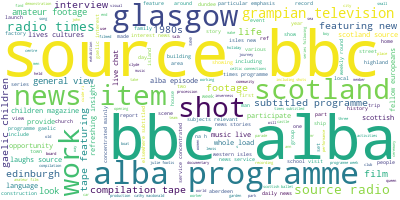

In [14]:
# Join the different summaries together.
long_string = ','.join(list(df['summary_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()